# Chapter Erosion Dilation Open Close

In [1]:
import sys
sys.path.append('/home/commun/tp-morpho/')
from tp_init import *

## Structuring elements
Below are the basic structuring elements available in SMIL:<br/>

| <img src="../illustrations/cross_se.png" width="200px"/>| <img src="../illustrations/squ_se.png" width="200px"/> | <img src="../illustrations/hex_se.png" width="200px"/>  | <img src="../illustrations/vert_se.png" width="200px"/> | <img src="../illustrations/horiz_se.png" width="200px"/> |
|------|------|------|------|------|
|<center>CrossSE()</center>|<center>SquSE()</center>|<center>HexSE()</center>|<center>VertSE()</center>|<center>HorizSE()</center>|

We can construct new structuring elements with points defined by their indexes. For example
<code>mySE= StrElt(False,(0,1,5))</code> is equivalent to  <code>HorizSE()</code>.
Segment structuring elements are already implemented in tp_init.py as follows:

Segments in the square lattice:
<pre><code>
se1 =  StrElt(False,(0,1))
se2 =  StrElt(False,(0,2))
...
se8 =  StrElt(False,(0,8))</code></pre>

Segments in the hexagonal lattice:
<pre><code>
seh1 =  StrElt(True,(0,1))
seh2 =  StrElt(True,(0,2))
...
seh6 =  StrElt(True,(0,6))
</code></pre>

## Basics on erosion, dilation, opening and closing

### Dilation and erosion

Apply dilations and erosions with hexagonal structuring elements of different sizes to binary images.
Observe their effects by displaying the difference between input and output. You may also change the shape of the structuring element (square, cross, vertical, horizontal...).

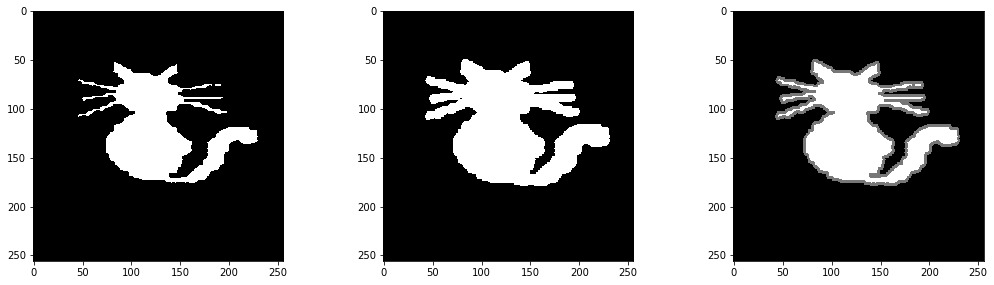

original, dilated with HexSE(3), in grey modified pixels
----------------------------


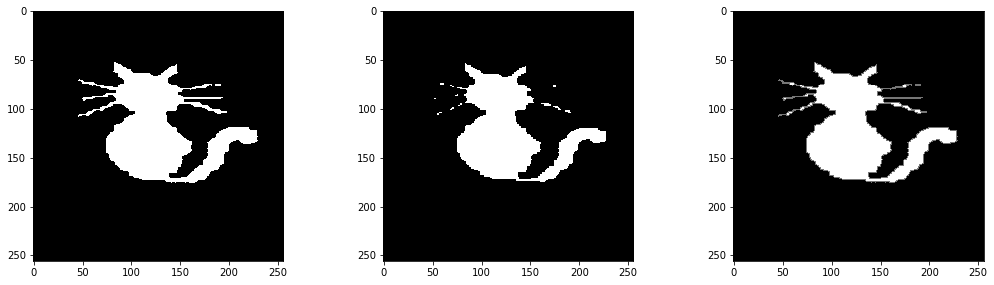

original, eroded with HexSE(1), in grey modified pixels
----------------------------


In [2]:
# Load input image
imIn = Image(images_dir+"/Bin/cat.png")

# Allocate output image
imDil,imEro = Image(imIn),Image(imIn)
imDisp1,imDisp2 = Image(imIn),Image(imIn)

# Dilate an input image by a hexagonal structuring element of different sizes
se =  HexSE()
size = 3
dilate(imIn,imDil,se(size))
compare(imIn,"!=",imDil,100,imDil,imDisp1)
disp([imIn,imDil,imDisp1])
print("original, dilated with HexSE("+str(size)+"), in grey modified pixels")
print("----------------------------")

# Erode an input image by a hexagonal structuring element se of different sizes
size = 1
erode(imIn,imEro,se(size))
compare(imIn,"!=",imEro,100,imEro,imDisp2)
disp([imIn,imEro,imDisp2])
print("original, eroded with HexSE("+str(size)+"), in grey modified pixels")
print("----------------------------")

Do the same on grayscale images.

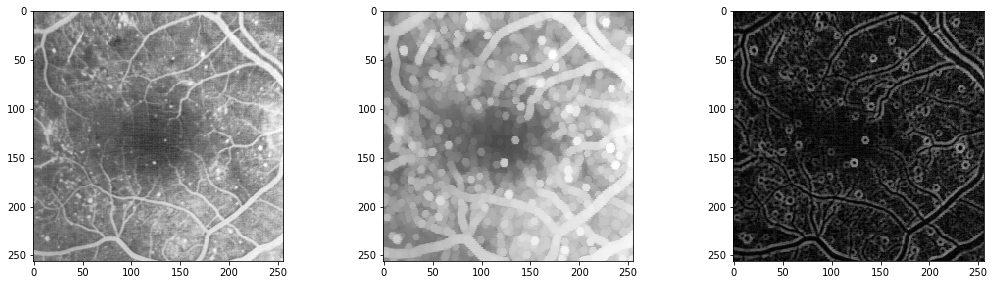

original, dilated with HexSE(3), dilated - original
----------------------------


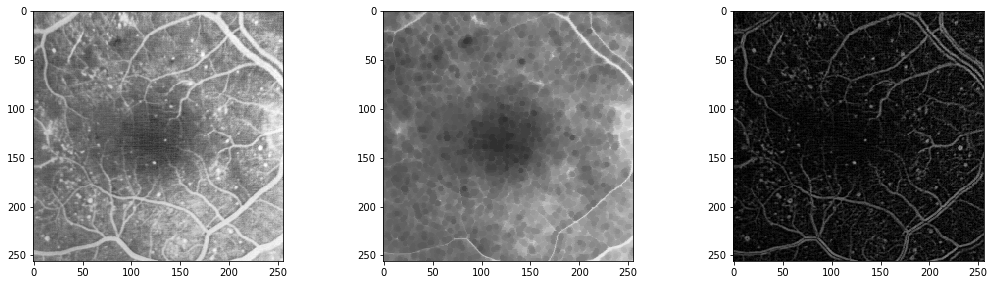

original, eroded with HexSE(2), original - eroded
----------------------------


In [3]:
# Load input image
imIn = Image(images_dir+"/Gray/retina.png")

# Dilate an input image by a hexagonal structuring element se of different sizes
se =  HexSE()
size = 3
dilate(imIn,imDil,se(size))
#compare(imIn,"!=",imDil,100,imDil,imDisp1)
sub(imDil, imIn, imDisp1)
disp([imIn,imDil,imDisp1])
print("original, dilated with HexSE("+str(size)+"), dilated - original")
print("----------------------------")

# Erode an input image by a hexagonal structuring element se of different sizes
size = 2
erode(imIn,imEro,se(size))
#compare(imIn,"!=",imEro,100,imEro,imDisp2)
sub(imIn, imEro, imDisp2)
disp([imIn,imEro,imDisp2])
print("original, eroded with HexSE("+str(size)+"), original - eroded")
print("----------------------------")

### Opening and closing

Using the functions <code>dilate</code> and <code>erode</code>, implement the adjunction opening ($\delta_B\varepsilon_B$) and closing ($\varepsilon_B\delta_B$) by a structuring element $B$.

In [4]:
def myOpening(imIn, imOut, nl):
    imErod = Image(imIn)
    erode(imIn, imErod, nl)
    dilate(imErod, imOut, nl)
    return

def myClosing(imIn, imOut, nl):
    imDil = Image(imIn)
    dilate(imIn, imDil, nl)
    erode(imDil, imOut, nl)
    return

Apply openings and closings to binary and grey level images, with several structuring elements. Observe their effects, check the idempotence, compare to the existing <code>open</code> and <code>close</code> functions.

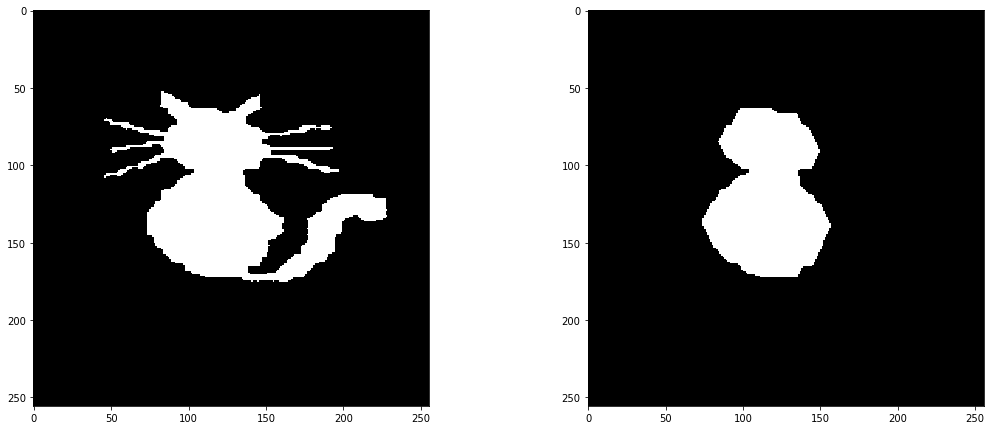

Applying twice the operator has not changed the result.
The implemented and the existing operators give the same results.


In [5]:
imIn = Image(images_dir+"/Bin/cat.png")
#imIn = Image(images_dir+"/Gray/retina.png")
imOut, imOut2, imCmp = Image(imIn), Image(imIn), Image(imIn)

nl = HexSE # StrElt(True,(0,2)) # StrElt(True,(0,5,2)) # se4
seSize = 10
myOperator = myOpening # myClosing
existingOp = open # close
myOperator(imIn, imOut, nl(seSize))
disp([imIn,imOut])

# check indempotence
myOperator(imOut, imOut2, nl(seSize))
compare(imOut, '!=', imOut2, 255, 0, imCmp)
if maxVal(imCmp) == 0:
    print('Applying twice the operator has not changed the result.')
else:
    print('Applying twice the operator has changed the result: wrong implementation.')
    disp([imOut,imOut2, imCmp])

# Comapre to existing operator
existingOp(imOut, imOut2, nl(seSize))
compare(imOut, '!=', imOut2, 255, 0, imCmp)
if maxVal(imCmp) == 0:
    print('The implemented and the existing operators give the same results.')
else:
    print('The implemented and the existing operators give different results: wrong implementation.')
    disp([imOut,imOut2, imCmp])

In the image Bin/ant.png, remove *only* the ant's legs and antennas.

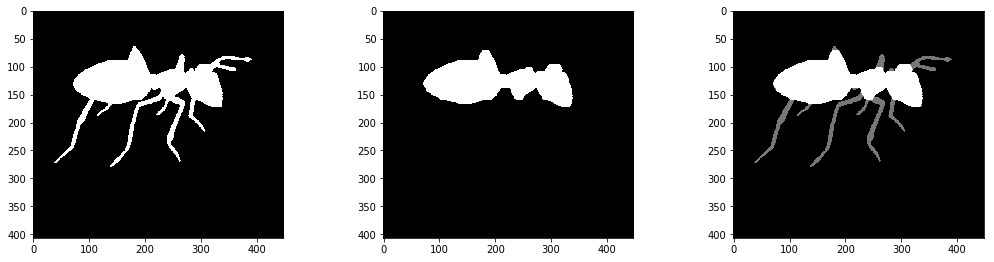

original, opening with HexSE(10), in grey modified pixels
----------------------------


In [6]:
imIn = Image(images_dir+"/Bin/ant.png")
imOpen, imDisp = Image(imIn), Image(imIn)
se = HexSE()#VertSE() #HexSE()
size = 10
open(imIn, imOpen, se(size))
compare(imIn,"!=",imOpen,100,imOpen,imDisp)
disp([imIn,imOpen,imDisp])
print("original, opening with HexSE("+str(size)+"), in grey modified pixels")
print("----------------------------")

Try to remove *only* the cat's whiskers in the image Bin/cat.png.

With simple openings, we fail to remove the whiskers without disconnecting the tail from the cat.

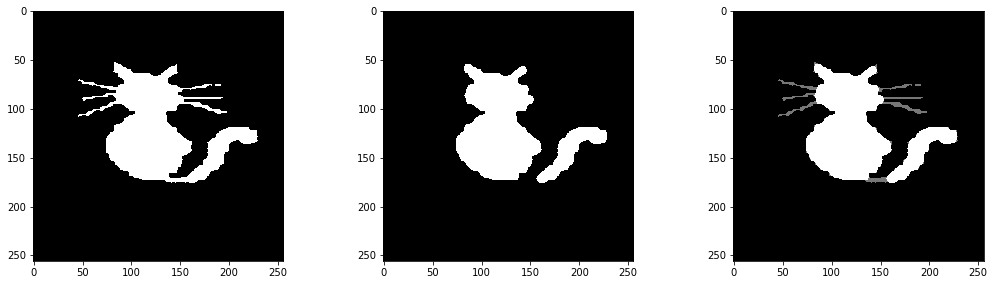

original, opening with HexSE(3), in grey modified pixels
----------------------------


In [7]:
imIn = Image(images_dir+"/Bin/cat.png")
imOpen, imDisp = Image(imIn), Image(imIn)
se = HexSE()#VertSE() #HexSE()
size = 3
open(imIn, imOpen, se(size))
compare(imIn,"!=",imOpen,100,imOpen,imDisp)
disp([imIn,imOpen,imDisp])
print("original, opening with HexSE("+str(size)+"), in grey modified pixels")
print("----------------------------")

Remove *only* the small dark deffects from the image Gray/lung1.png.

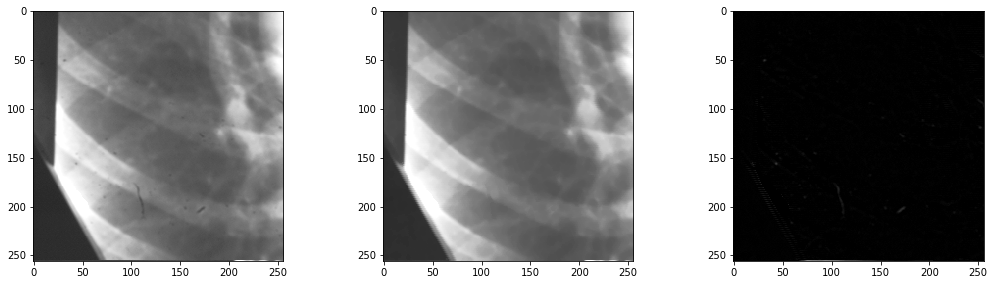

original, opening with HexSE(2), original - opening
----------------------------


In [8]:
imIn = Image(images_dir+"/Gray/lung1.png")
imClose, imDisp = Image(imIn), Image(imIn)
se = HexSE()#VertSE() #HexSE()
size = 2
close(imIn, imClose, se(size))
sub(imClose, imIn, imDisp)
disp([imIn,imClose,imDisp])
print("original, opening with HexSE("+str(size)+"), original - opening")
print("----------------------------")

Try to remove *only* the bright spots in the image Gray/retina.png.

Again, with a simple opening, we remove the bright aneurisms as well as part of the vessels.

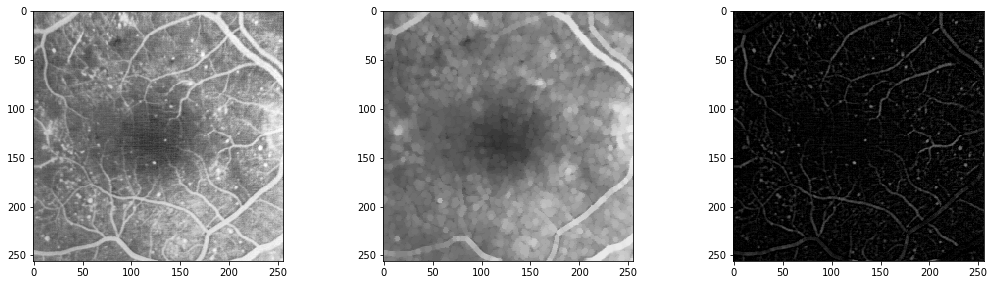

original, opening with HexSE(2), original - opening
----------------------------


In [9]:
imIn = Image(images_dir+"/Gray/retina.png")
imOpen, imDisp = Image(imIn), Image(imIn)
se = HexSE()#VertSE() #HexSE()
size = 2
open(imIn, imOpen, se(size))
sub(imIn, imOpen, imDisp)
disp([imIn,imOpen,imDisp])
print("original, opening with HexSE("+str(size)+"), original - opening")
print("----------------------------")

## Distance Function

The distance function assigns to each pixel of a binary object the distance to the closest pixel of the background. It can be implemented by a series of erosions (see below). Efficient implementations use queues or recursive approaches.

The distance function is used to separate overlapping binary objects. We will see this in the "coffee grains" exercise during the course on segmentation. For now, notice that the maxima of the distance function allow to distinguish between touching convex components.

Syntax:<code>dist(imin,imout,nl)</code>.

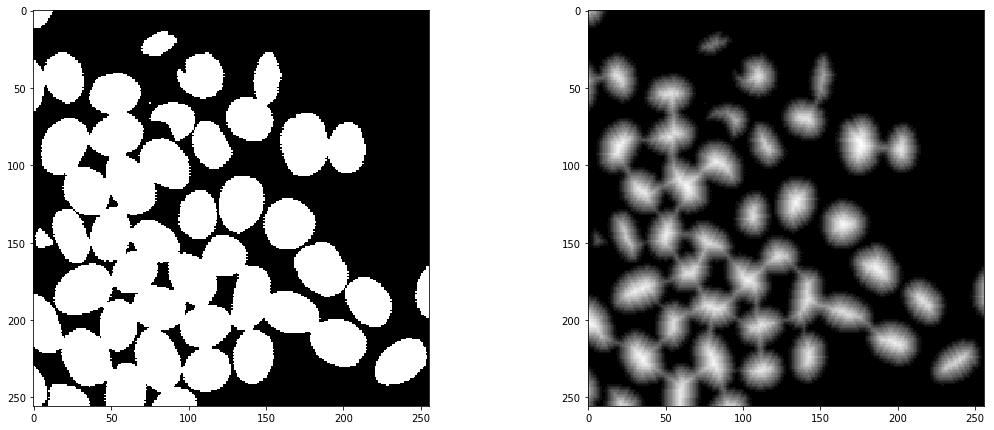

In [10]:
def myDistance(imIn,imDist,nl):
    # Initializes intermediate images
    imWork,imTemp = Image(imIn), Image(imIn)
    copy(imIn,imWork)
    copy(imIn,imTemp)
    fill(imDist,0)
    
    #Initialization
    cpt = 1
    
    #Erode while the image is not empty (volume == 0)
    while (maxVal(imWork)!= 0):
        erode(imWork,imTemp,HexSE())
        
        #Assign the current distance to the modified pixels
        compare(imWork,">", imTemp, cpt, imDist, imDist)  
        
        #Increase the "distance" variable
        cpt = cpt + 1
        copy(imTemp, imWork)



# Load Input image
imIn = Image(images_dir+"/Bin/coffee.png")
imDist=Image(imIn)
nl = HexSE()
myDistance(imIn,imDist,nl)
mv = maxVal(imDist)
mul(imDist, 255/mv, imDist)

disp([imIn,imDist])

## Supremum of openings
An operator $\Psi$ is an opening if it is increasing, idempotent and anti-extensive. The supremum of openings is an opening. The infimum of openings is not an opening (not idempotent). As a counterexample see the figure below. The infimum of two openings, one with a horizontal segment and the other with a vertical segment, of a cross is equal to the intersection of the cross arms. If we iterate the process, we obtain an empty image. The infimum of openings is not idempotent, and therefore it is not an opening.

<img src="../illustrations/inf_open_idempotence.png" width="500px;"/>

<center> Inf of openings is not a opening (not idempotent) </center>



### Application: detection of  microaneurysms

Implement the opening that combines the openings by segments in different directions. Try to isolate the micro aneurysms (small white spots) of the image retina.png.

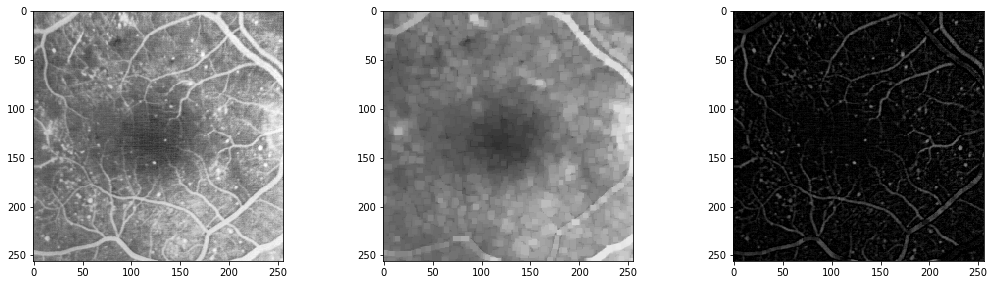

original, openings by hexagonal SE and corresponding residue


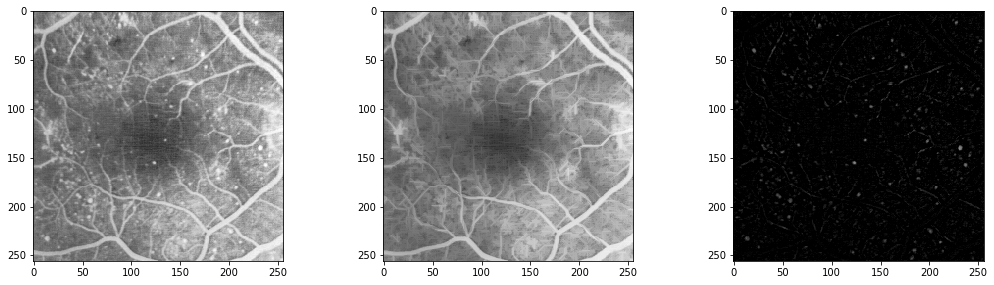

original, supremum of openings and corresponding residue


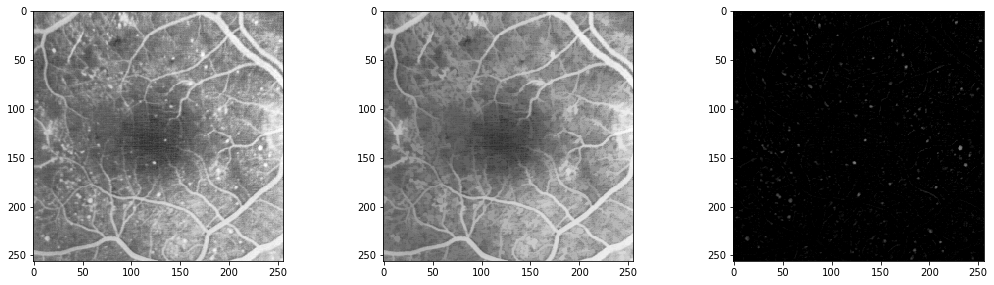

original, reconstruction from previous opening and corresponding residue


In [11]:
def ImSupOpen(imIn,size,imOut):
    diagonal1SE = StrElt(False,(0,4,8))
    diagonal2SE = StrElt(False,(0,2,6))

    # Opening that combines openings by segments in different directions 

    imTmp = Image(imIn)
    # Horizontal and vertical directions

    open(imIn,imTmp,VertSE(size))
    open(imIn,imOut,HorizSE(size))
    sup(imTmp,imOut,imOut)

    # Diagonal directions
    open(imIn,imTmp,diagonal1SE(size))
    sup(imTmp,imOut,imOut)

    open(imIn,imTmp,diagonal2SE(size))
    sup(imTmp,imOut,imOut)


nl = SquSE()
imIn=Image( images_dir + "/Gray/retina.png")
# Load input image and allocates intermediate images
imSup,imBuild, imOpen,imResidue =Image(imIn),Image(imIn),Image(imIn),Image(imIn)

open(imIn,imOpen, nl(2))
sub(imIn, imOpen, imResidue)
disp([imIn,imOpen,imResidue])
print("original, openings by hexagonal SE and corresponding residue")
    
ImSupOpen(imIn,3,imSup)
sub(imIn, imSup, imResidue)
disp([imIn,imSup,imResidue])
print("original, supremum of openings and corresponding residue")
    
#buildOpen(imIn, imBuild, nl(2))
build(imSup, imIn, imBuild)
sub(imIn, imBuild, imResidue)
disp([imIn,imBuild,imResidue])
print("original, reconstruction from previous opening and corresponding residue")

The first row shows a simple opening by a hexagonal SE, like earlier. Its corresponding top-hat (the difference between the original and an opening) is shown in last column. We see that most vessels disappear along with the small bright aneurisms.

The second row shows an example of supremum of openings of size 4 with 4 segments in 4 different directions. This time, a much larger part of the vessels is kept. Some small parts of the vessels are still removed.

The third row shows an opening by reconstruction using as marker the previous sup of openings. The geodesical reconstruction now allows to recover perfectly the vessels and not the aneurisms. This method wil be seen in the course on Geodesy.

Another way to discriminate vessels from microaneurysms (small white spots of the retina2 image) is using an area opening (last row).

## Area opening

### For binary images

An area opening of a binary image consists in removing the connected components with area smaller than a given threshold.  One can verify easily that it is increasing, idempotent and anti-extensive, and therefore an opening.

Note that, as usual, the connectivity is defined by the structuring element.

Try the function <code>areaOpen(imIn, area_threshold, imOpen)</code> on different binary images.

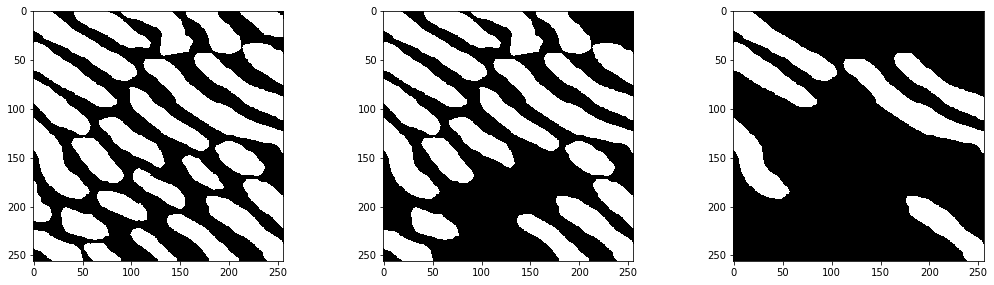

Original, area opening for thresholds 1000 and 2000.


In [12]:
imIn = Image(images_dir+'Bin/eutectic.png')
imOpen1, imOpen2 = Image(imIn), Image(imIn)
ths1, ths2 = 1000, 2000 # 10, 20
nl = HexSE() # StrElt(False,(0, 4, 8)) # You can try different structuring elements 

areaOpen(imIn, ths1, imOpen1, nl)
areaOpen(imIn, ths2, imOpen2, nl)

disp([imIn, imOpen1, imOpen2])
print('Original, area opening for thresholds ' + str(ths1) + ' and ' + str(ths2) + '.')

Remove the noise from the image Bin/noise.png.

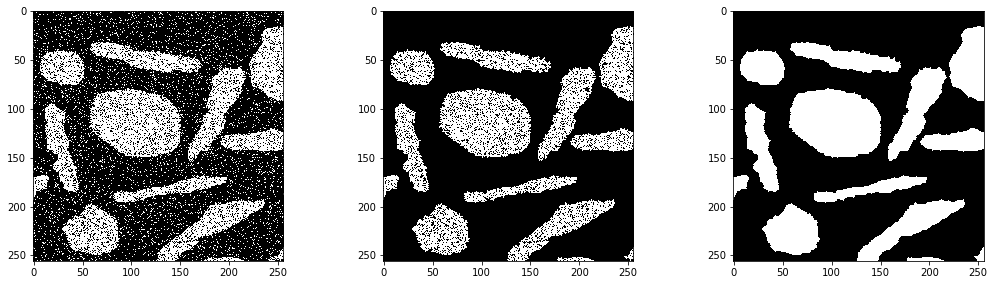

Original, area opening for thresholds 10, closing of the previous.


In [13]:
imIn = Image(images_dir+'Bin/noise.png')

imOpen, imClose = Image(imIn), Image(imIn)
ths = 10
nl = CrossSE() #HexSE()

areaOpen(imIn, ths, imOpen, nl)
close(imOpen, imClose, HexSE(2))
disp([imIn, imOpen, imClose])
print('Original, area opening for thresholds ' + str(ths) + ', closing of the previous.')

### For grayscale images

The area opening generalizes to grayscale images as follows.

To any gray level we associate the binary image obtained by thresholding above that level. This thresholding is a decreasing function of the considered gray level. This means that for each pixel, the connected component it belongs to gets smaller as the threshold increases.

Therefore, for a grayscale image, the area opening of size $\lambda$ returns, at each pixel, the greatest threshold for which the pixel belongs to a connected component larger than $\lambda$ in the corresponding binary image.

$$ areaOpen_{\lambda}(im)(x) = \bigvee \lbrace t, areaCC(x, im_t) \geq \lambda\rbrace ,$$

where 
- $im_t$ is the binary image obtained by setting to $1$ pixels with values larger than $t$ in $im$
- $areaCC(x, im_y)$ is the area of the connected component of pixel $x$ in $im_t$.

First, observe the decreasingness of the thresholding operator on grayscale images, as a function of the threshold $t$.

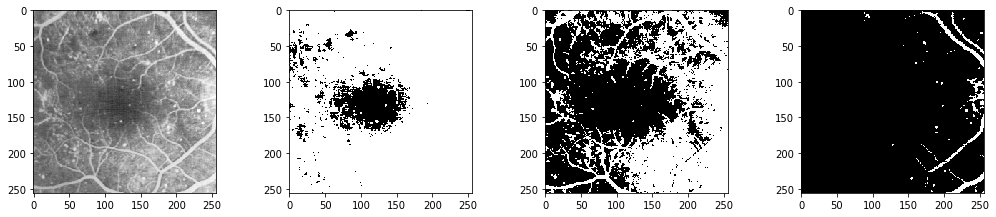

Thresholding at increasing gray levels.


In [14]:
imIn = Image(images_dir+'Gray/retina.png')
imBin1, imBin2, imBin3 = Image(imIn), Image(imIn), Image(imIn)
lev1, lev2, lev3 = 80, 120, 200

threshold(imIn, lev1, imBin1)
threshold(imIn, lev2, imBin2)
threshold(imIn, lev3, imBin3)

disp([imIn, imBin1, imBin2, imBin3])
print('Thresholding at increasing gray levels.')

Now, apply an area opening to detect the microaneurysms in Gray/retina.png

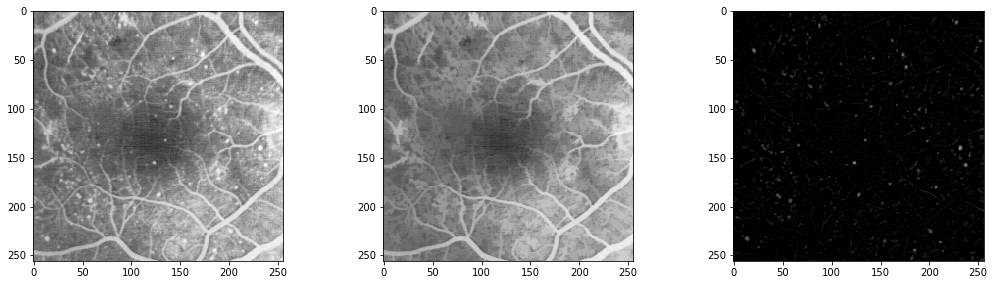

original, areaOpen and corresponding residue


In [15]:
imAOpen = Image(imIn)
areaOpen(imIn,50,imAOpen,nl)
sub(imIn, imAOpen, imResidue)
disp([imIn,imAOpen,imResidue])
print("original, areaOpen and corresponding residue")

## Granulometry

Show the size distribution of objects in images like Bin/balls.png, Bin/coffee.png, Bin/partic1.png, Gray/salt.png.

In [16]:
#imIn = Image(images_dir+'Bin/balls.png')
#imIn = Image(images_dir+'Bin/coffee.png')
#imIn = Image(images_dir+'Bin/partic1.png')
imIn = Image(images_dir+'Gray/salt.png')
w =imIn.getWidth()
h =imIn.getHeight()

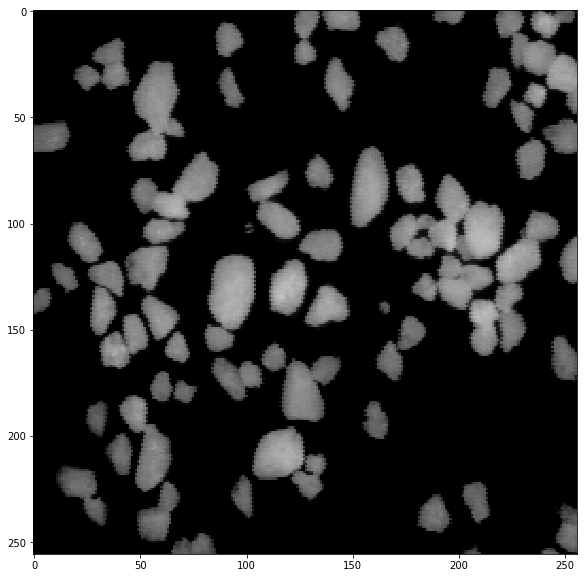

In [17]:
disp(imIn)

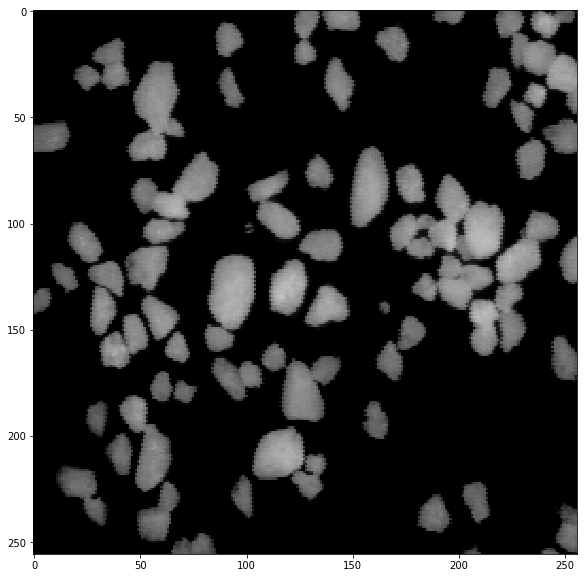

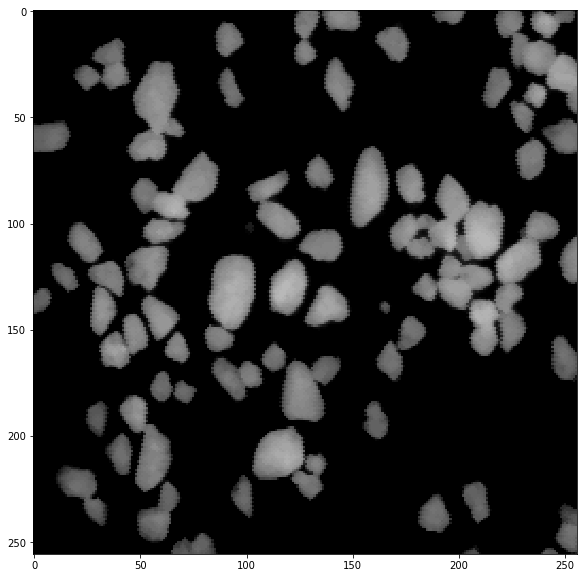

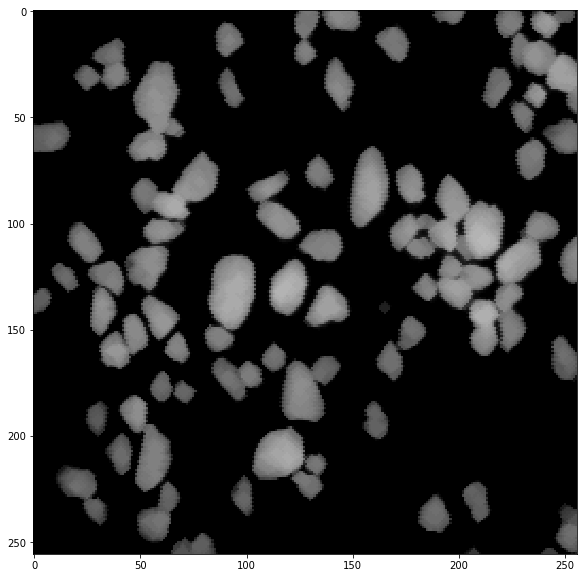

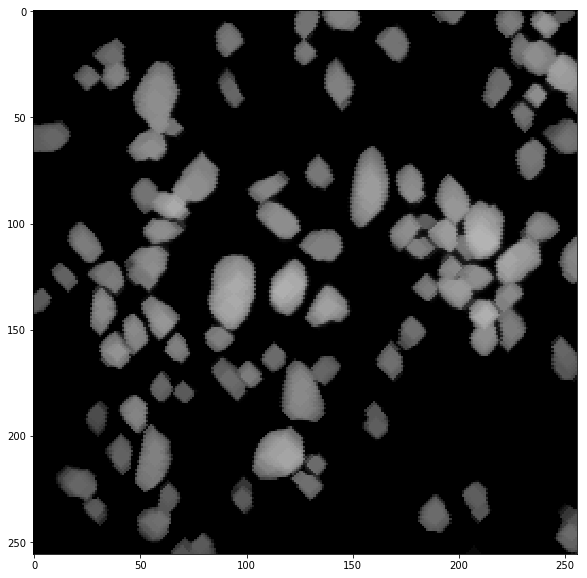

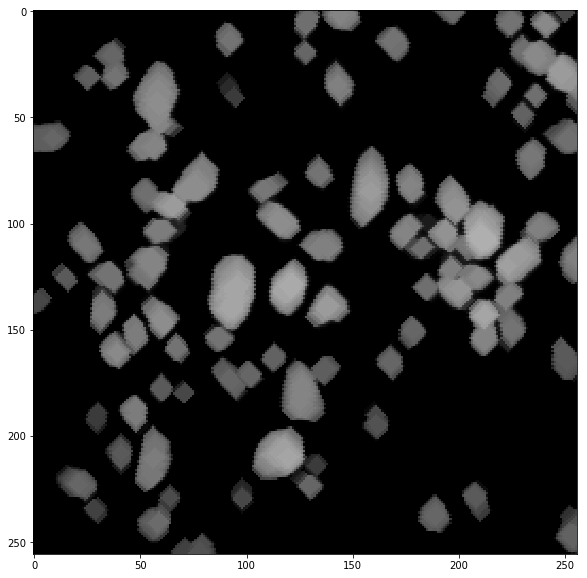

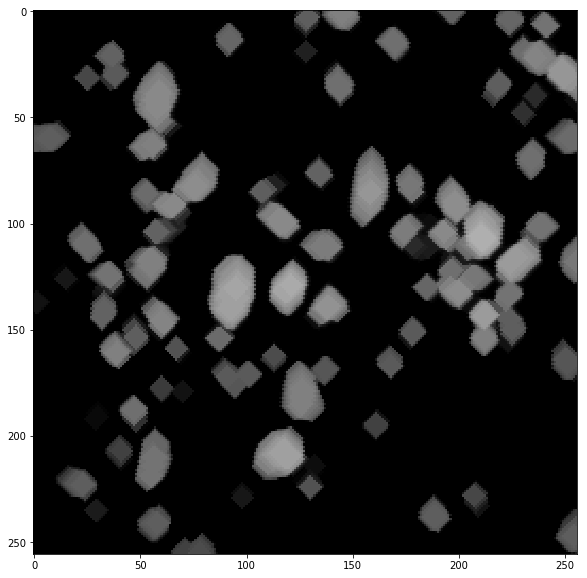

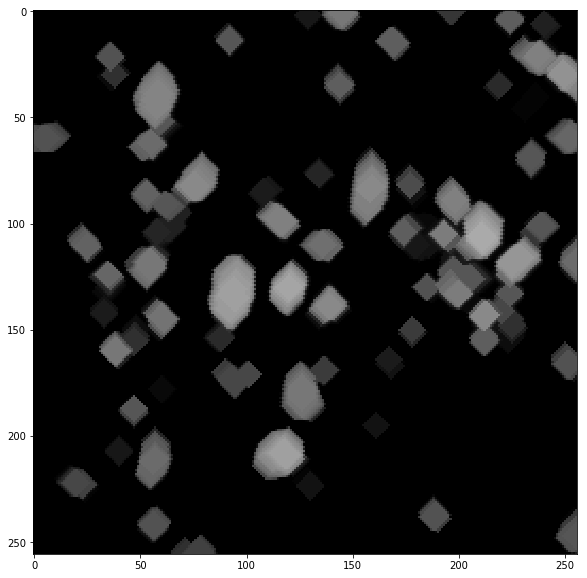

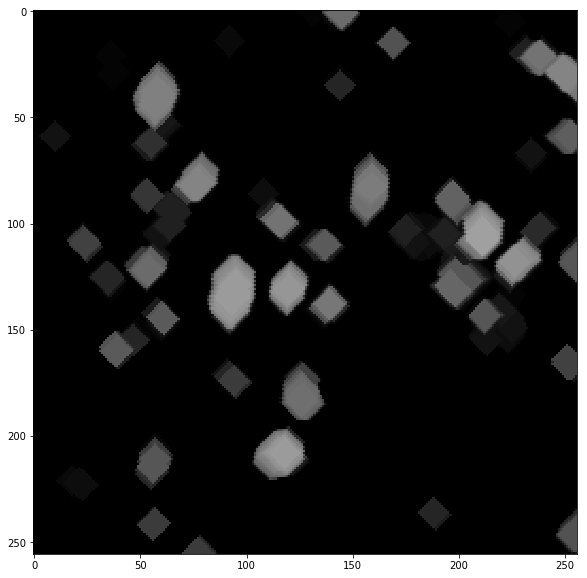

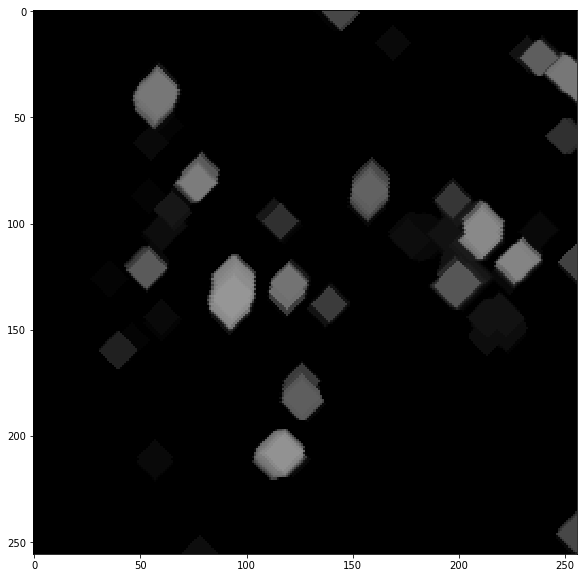

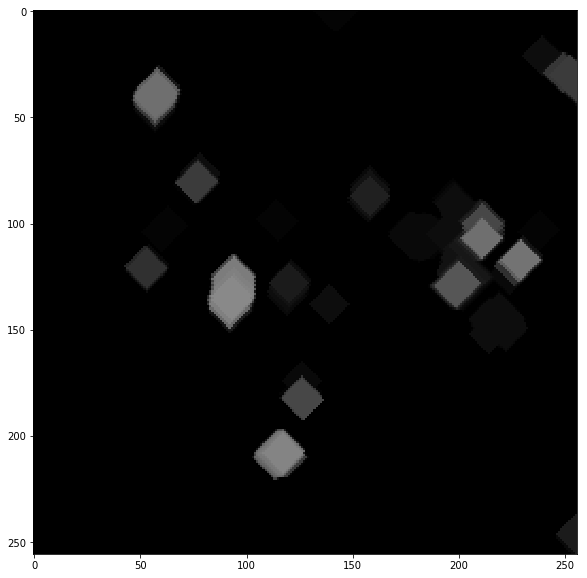

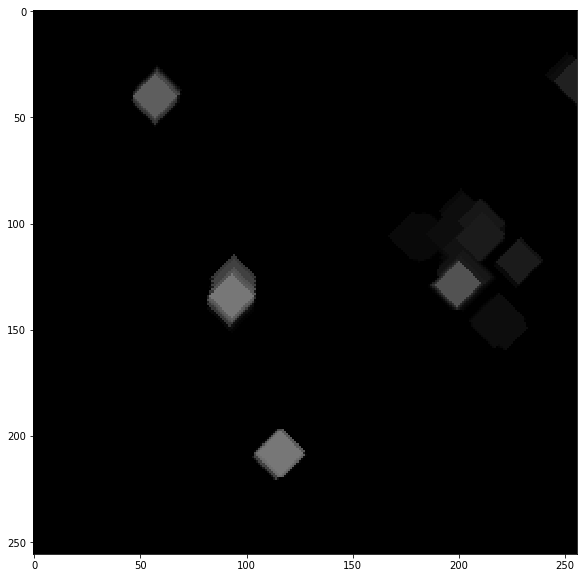

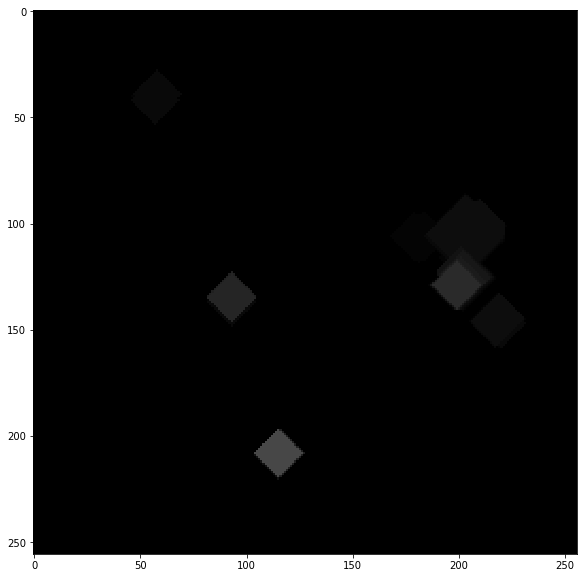

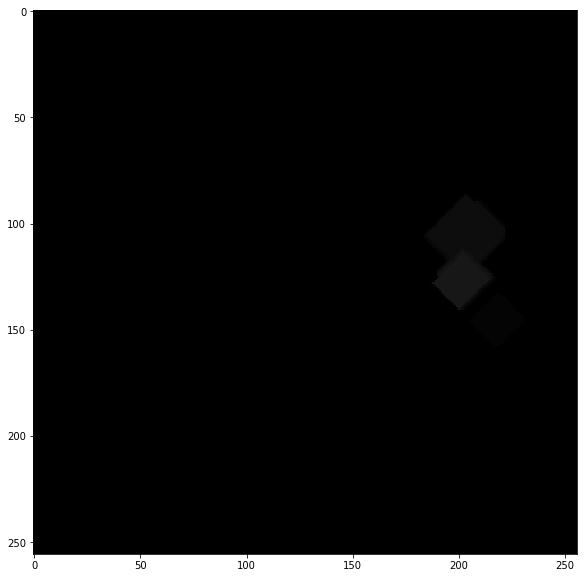

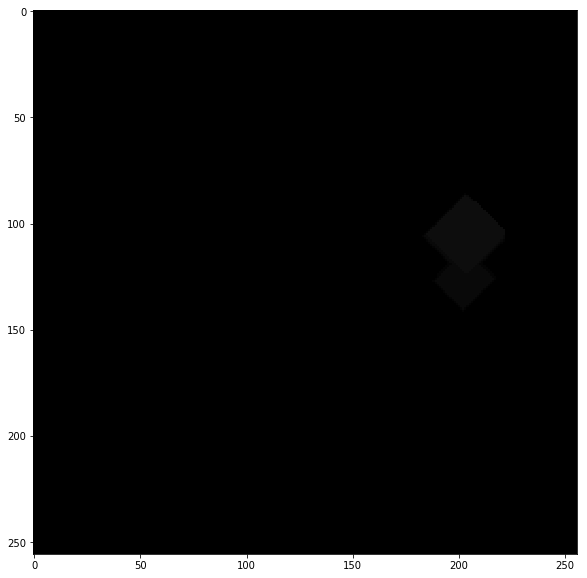

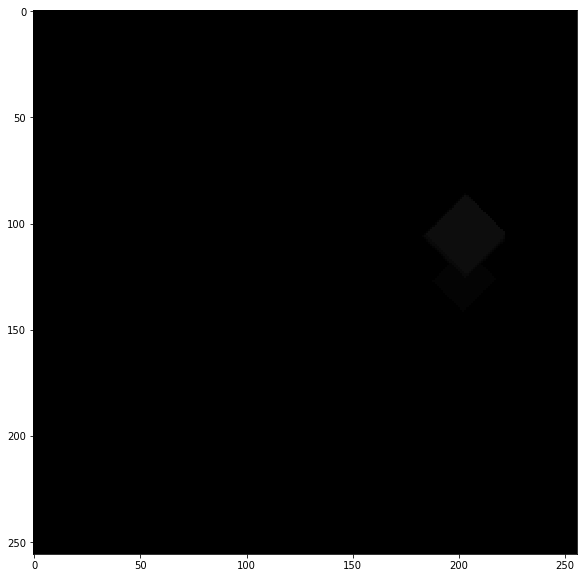

In [18]:
s0 = sum([imIn[i] for i in range(w*h)])/255
s = [s0]
size_max = 15
disp(imIn)
for size in range(1, size_max):
    open(imIn, imOpen, nl(size))
    disp(imOpen)
    s.append(sum([imOpen[i] for i in range(w*h)])/255)

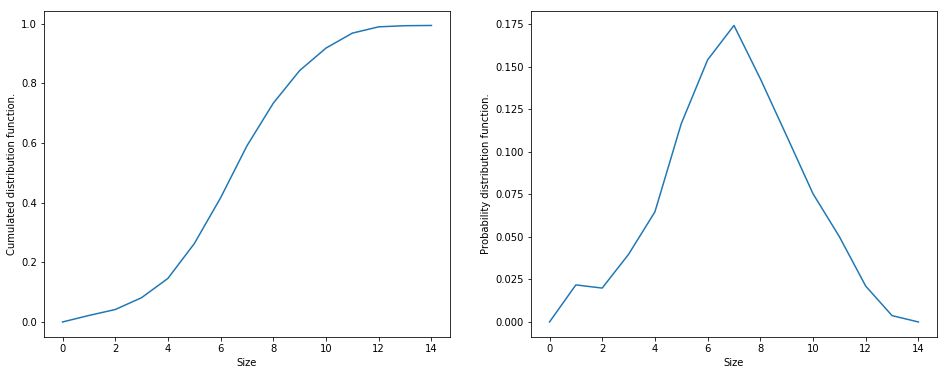

In [19]:
s = np.array(s)
F = 1 - s/s[0]
f = np.zeros(F.shape)
f[0] = 0
f[1:-1] = F[1:-1] - F[0:-2]
r = range(0, size_max)
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(r, F)
plt.xlabel('Size')
plt.ylabel('Cumulated distribution function.')
plt.subplot(1,2,2)
plt.plot(r, f)
plt.xlabel('Size')
plt.ylabel('Probability distribution function.')
plt.show()

## Top-hat : uniform illumination
The top-hat, defined as the difference between the original image and an opening, can be used for non uniform background subtraction. Take for example the "tools" image. You can observe that the left top corner is clearer than the right bottom corner. An opening of large size (larger than the largest object) removes all the objects of the foreground, providing an estimation of the background. Subtracting this estimation from the original image we obtain the objects on a uniform background.


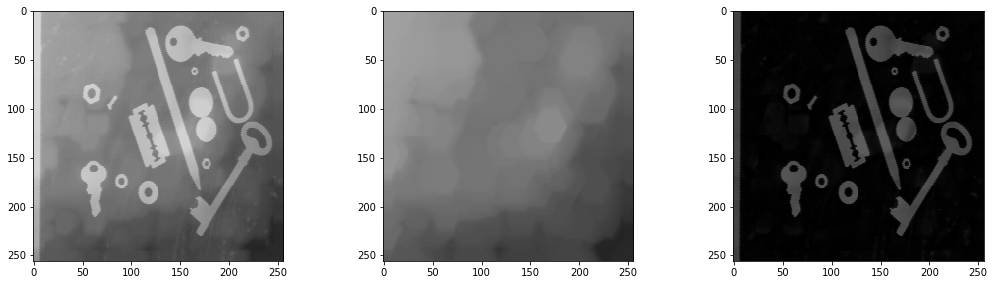

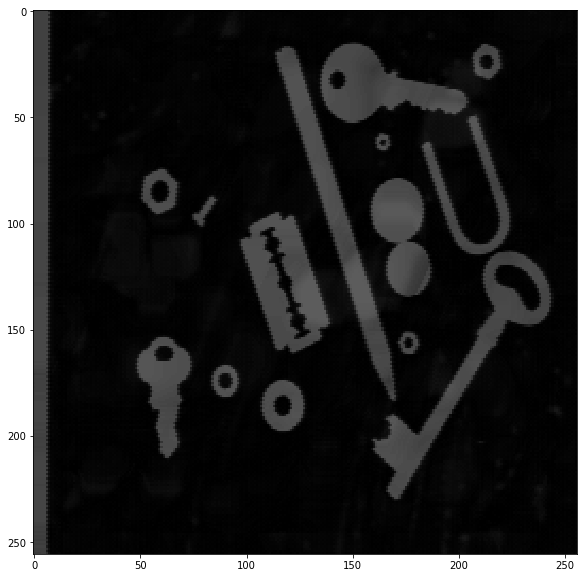

In [20]:
nl = HexSE()
imIn=Image(images_dir + "/Gray/tools.png")

# Load input image and allocates intermediate images
imOpen,imOut = Image(imIn),Image(imIn)
    
# Remove the finest details of the image by opening
open(imIn,imOpen,nl(15))
    
# Substract the resulting image to the initial image 
sub(imIn, imOpen, imOut)

disp([imIn,imOpen,imOut])
disp(imOut)

## Decomposition of a structuring element

The dilation by a structuring element $B_1$ followed by the dilation by se $B_2$ is equivalent to a dilation by se $B$ equal to the dilation of $B_1$ by $B_2$:

$$  \delta_{B_2}\delta_{B_1} =\delta_{A} ~ ~ ~   with ~ ~ B = \delta_{B_2}(B_1)$$

which is a consequence of the associativity of the Minkowski addition:

$$X\oplus(B_1\oplus B_2) =  (X\oplus B_1)\oplus B_2.$$

In other words, the dilation by 2 structuring elements (first $B_1$ and the result dilated by $B_2$) may be obtained by a single dilation with structuring element $B$, equal to $B_1$ dilated by $B_2$. According to this equation, the dilation of a hexagon may be computed by a series of 3 dilations by a segment, carefully selecting the direction of these segments. Let us see this effect when dilating a single pixel $x$ by the following three segments $B_1$, $B_2$ and $B_3$:
<pre>
       .     .                  1     .                  .     .
    .     1     .            .     1     .            .     1     1
        1    .                  .     .                  .     . 

          B1                         B2                     B3
</pre>

<pre>
     .     .           .     .               1     .              1     1
  .     x     .     .     1     .         1     1    .         1     1     1
     .     .            1    .               1     .              1     1 

starting point       dil(x,B1)       dil(dil(x,B1),B2)    dil(dil(dil(x,B1),B2),B3)
</pre>

As expected, the result of these 3 dilations is a hexagon.

Thus, in theory,a dilation by a hexagon can be performed by means of 3
consecutive dilations by segments. But in practice, due to border
effects, the result may be wrong.  If the dilation by the first
segment goes beyond the border of the image, some white pixels are
missing. The pixels outside the image have no effect in the following
operations (the two dilations in other directions) and then some white
pixels are missing in the final result with respect to the correct result.

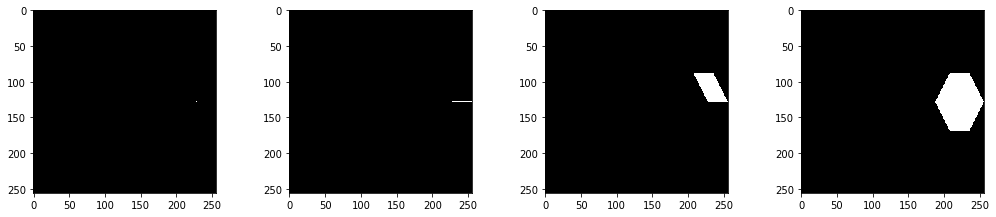

dilation by an hexagon (size 40) by means of 3 segment dilations. Border effect because the first dilation should have gone beyond the image domain


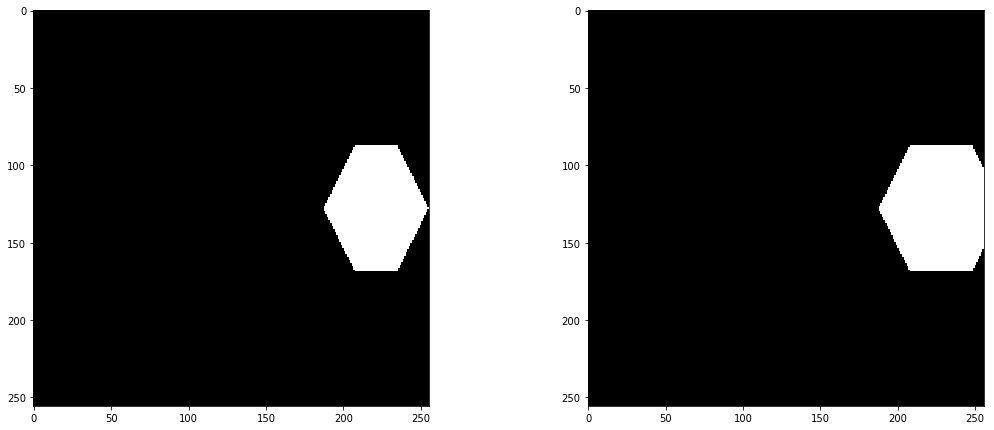

Comparison. Left: version with border effect; right: correct version


In [21]:
# Load input image
imIn = Image(256,256)

# Allocate intermediate images
imOut1,imOut2 = Image(imIn),Image()
imTmp = Image(imIn)
fill(imIn,0)
imIn.setPixel(228,128,255)

# Structuring elements, whose combination yields an hexagonal structuring element
seh1,seh3,seh5 = StrElt(True,(0,1)), StrElt(True,(0,3)), StrElt(True,(0,5))

# No border effects
dilate(imIn ,imTmp, seh1(20))
dilate(imTmp, imTmp, seh3(20))
dilate(imTmp, imOut1, seh5(20))


# Border effects
imTmp2 = Image(imIn)
dilate(imIn ,imTmp,seh1(40))
dilate(imTmp, imTmp2,seh3(40))
dilate(imTmp2, imOut2,seh5(40))

disp([imIn,imTmp,imTmp2,imOut2])
print("dilation by an hexagon (size 40) by means of 3 segment dilations. Border effect because the first dilation should have gone beyond the image domain")

imOut3 = Image(imOut1)
dilate(imIn,imOut3,HexSE(40))

disp([imOut2,imOut3])
print("Comparison. Left: version with border effect; right: correct version")